# Temperature of CDW , and depth near the shelf

## Part 1: Temperature of CDW

We have a lot of variability on the CSHT/ASC correlations, but we cant explain why some regions have a higher correlation than others. One possible reason is that our CDW could have different temperatures offshore, and the locations where CDW is the warmest, are the onces with higher heat transport, and hence higher transport. Let's plot the mean temperature of CDW, to see if that makes sense

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col
import pandas as pd
import scipy.stats as stats
from tqdm import tqdm
import logging
import matplotlib.cm as cm
from xhistogram.xarray import histogram


logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/x77/wf4500/ASC_project/analysis_figs/'

In [2]:
client = Client(n_workers=48)

In [3]:
iaf_cycle3 = '01deg_jra55v140_iaf_cycle3'
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')

temp =  cc.querying.getvar(iaf_cycle3,'temp',session , frequency = '1 monthly').sel(yt_ocean=slice(-90,-55)).mean('time') - 273.15


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

In [4]:
%%time
temp.load()

CPU times: user 17min 5s, sys: 1min 41s, total: 18min 47s
Wall time: 19min 33s


<xarray.DataArray 'temp' (st_ocean: 75, yt_ocean: 584, xt_ocean: 3600)> Size: 631MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.68862915, 0.7445679 , 0.7993164 , ..., 0.56430054,
         0.598053  , 0.6386719 ],
        [0.72210693, 0.77194214, 0.81674194, ..., 0.59313965,
         0.63150024, 0.6746826 ],
        [0.7590637 , 0.8010559 , 0.8361206 , ..., 0.6296387 ,
         0.67178345, 0.71487427]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 5kB -81.11 -81.07 -81.02 ... -55.07 -55.01
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03

Let's now import age

In [5]:

age =  cc.querying.getvar(iaf_cycle3,'age_global',session , frequency = '1 monthly').sel(yt_ocean=slice(-90,-55)).mean('time')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

In [6]:
%%time
age.load()

CPU times: user 17min 45s, sys: 3min 49s, total: 21min 34s
Wall time: 22min 30s


<xarray.DataArray 'age_global' (st_ocean: 75, yt_ocean: 584, xt_ocean: 3600)> Size: 631MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 5kB -81.11 -81.07 -81.02 ... -55.07 -55.01
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03

Let's use the same approach to defined the CDW in Z layers as we did in sigma layers, I.e., normalize the age by its maximum along the water column, and define CDW as waters with age above 0.95. I know that should yield different results in $z^*$ and $\sigma$, but it should be good enough for a first evaluation.

In [7]:
age_norm  = age / age.max('st_ocean')
age_norm_absmax  = age / age.max() #this definition allow CDW to exist or not in any point/depth

Our CDW curtain showthat the CDW densities are often varying between 27.75 and 27.84. LEt's use that as a definition that allows existence or non existence of CDW (check fig S1 for example

In [8]:
%%time
σ0_mean =  cc.querying.getvar(iaf_cycle3,'pot_rho_0',session , frequency = '1 monthly', chunks = {}).sel(yt_ocean=slice(-90,-55)).mean('time').compute()


CPU times: user 18min 39s, sys: 1min 42s, total: 20min 21s
Wall time: 21min 24s


CDW masks, based on normalized age ( i.e., omnipresent CDW) will be:

In [9]:
CDW_mask_z = (age_norm.where(age_norm>=0.95) *0)+1

CDW_mean_depth = (CDW_mask_z * CDW_mask_z.st_ocean).mean('st_ocean')
CDW_max_depth = (CDW_mask_z * CDW_mask_z.st_ocean).max('st_ocean')
CDW_min_depth = (CDW_mask_z * CDW_mask_z.st_ocean).min('st_ocean')

CDW masks, based on density surfaces ( i.e., non-omnipressent CDW) will be:

In [10]:
CDW_mask_σ0 =  (σ0_mean.where(σ0_mean>=1027.75).where(σ0_mean<=1027.84) * 0) + 1
CDW_mean_depth_σ0 = (CDW_mask_σ0 * CDW_mask_σ0.st_ocean).mean('st_ocean')
CDW_max_depth_σ0 = (CDW_mask_σ0 * CDW_mask_σ0.st_ocean).max('st_ocean')
CDW_min_depth_σ0 = (CDW_mask_σ0 * CDW_mask_σ0.st_ocean).min('st_ocean')


Getting the CDW temperature in the $\sigma$ and $z^*$ definitions

In [11]:
#getting dzt for vertical averages
dzt =  cc.querying.getvar(iaf_cycle3,'dzt',session , frequency = '1 monthly', n=4, chunks = {}).sel(yt_ocean=slice(-90,-55)).mean('time').compute()



In [12]:
CDW_temp = (CDW_mask_z * temp)
CDW_mean_temp = CDW_temp.weighted(dzt.fillna(0)).mean('st_ocean')

In [13]:
CDW_temp_σ0 = (CDW_mask_σ0 * temp)
CDW_mean_temp_σ0 = CDW_temp_σ0.weighted(dzt.fillna(0)).mean('st_ocean')

Using the age definition:

In [14]:
CSHT_along_fine = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/'\
'Cross_slope_heat_transport/OM2_IAF/daily_rho/*').resample(time='1M').mean()

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: blockwise is preferred.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: blockwise is preferred.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engin

importing correlations

In [15]:
files_path = '/g/data/e14/qo9901/ASC_collab_CSHT_ds/'

# 10deg
file_extension = 'agemaskCDW_volav'

ds = xr.open_dataset(files_path + 'r_sq_annual_10degBins_' + file_extension + '.nc')
r_sq_annual_10deg = ds.r_sq_annual
ds.close()
ds = xr.open_dataset(files_path + 'r_sq_all_10degBins_' + file_extension + '.nc')
r_sq_all_10deg = ds.r_sq_all
ds.close()

# ds = xr.open_dataset(files_path + 'r_sq_clima_10degBins_' + file_extension + '.nc')
# r_sq_clima_10deg = ds.r_sq_clim
# ds.close()

ds = xr.open_dataset(files_path + 'r_sq_clima_10degBins_' + 'agemaskCDW_daily' + '.nc')
r_sq_clima_10deg = ds.r_sq_clim
ds.close()

'''
#changed
ds = xr.open_dataset(files_path + 'r_sq_daily_10degBins_' + file_extension + '.nc')
r_sq_clima_10deg = ds.r_sq_daily
ds.close()
#changed
'''

ds = xr.open_dataset(files_path + 'slope_annual_10degBins_' + file_extension + '.nc')
slope_sq_annual_10deg = ds.slope_annual
ds.close()
ds = xr.open_dataset(files_path + 'slope_all_10degBins_' + file_extension + '.nc')
slope_sq_all_10deg = ds.slope_all
ds.close()

ds = xr.open_dataset(files_path + 'slope_clima_10degBins_' + file_extension + '.nc')
slope_sq_clima_10deg = ds.slope_clima
ds.close()




file_extension = 'agemaskCDW_volav'
file_extension_daily_clima = 'agemaskCDW_daily'
ds = xr.open_dataset(files_path + 'r_sq_clima_10degBins_' + file_extension_daily_clima + '_corr.nc')
r_sq_daily_10deg = ds.r_sq_clim
ds.close()
CSHT_lon_along_contour = CSHT_along_fine.lon_along_contour.isel(time=0)
CSHT_lat_along_contour = CSHT_along_fine.lat_along_contour.isel(time=0)
r_sq_daily_10deg_interp = r_sq_daily_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})


In [16]:
from matplotlib.collections import LineCollection

In [17]:
def colored_line(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified along the line by a third value.

    It does this by creating a collection of line segments. Each line segment is
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should be the same size as x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Default the capstyle to butt so that the line segments smoothly line up
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # Compute the midpoints of the line segments. Include the first and last points
    # twice so we don't need any special syntax later to handle them.
    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    # Determine the start, middle, and end coordinate pair of each line segment.
    # Use the reshape to add an extra dimension so each pair of points is in its
    # own list. Then concatenate them to create:
    # [
    #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
    #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
    #   ...
    # ]
    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, **default_kwargs)
    lc.set_array(c)  # set the colors of each segment

    return ax.add_collection(lc)


In [18]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=0, vmax=2)

(-80.0, -60.0)

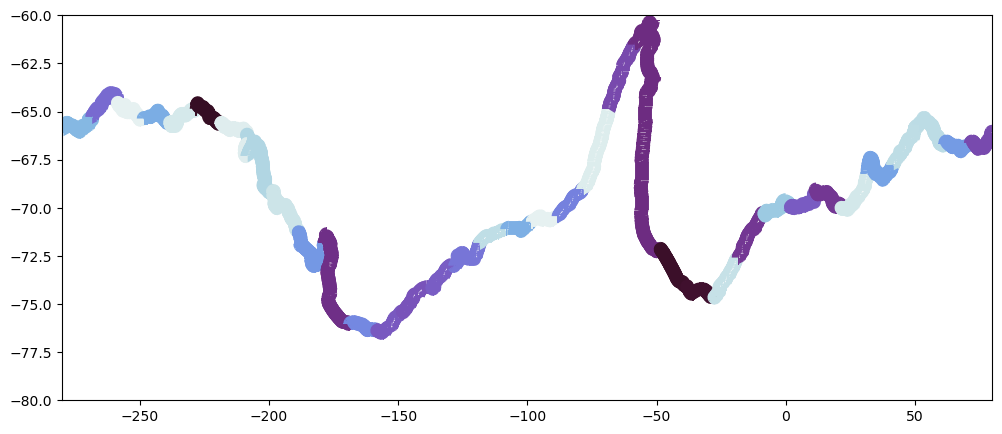

In [19]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
colored_line(CSHT_along_fine.lon_along_contour.isel(time=0)\
             , CSHT_along_fine.lat_along_contour.isel(time=0)\
             , r_sq_daily_10deg_interp, ax1, linewidth=10, cmap=cmocean.dense)
plt.xlim(-280,80)
plt.ylim(-80,-60)

(-80.0, -60.0)

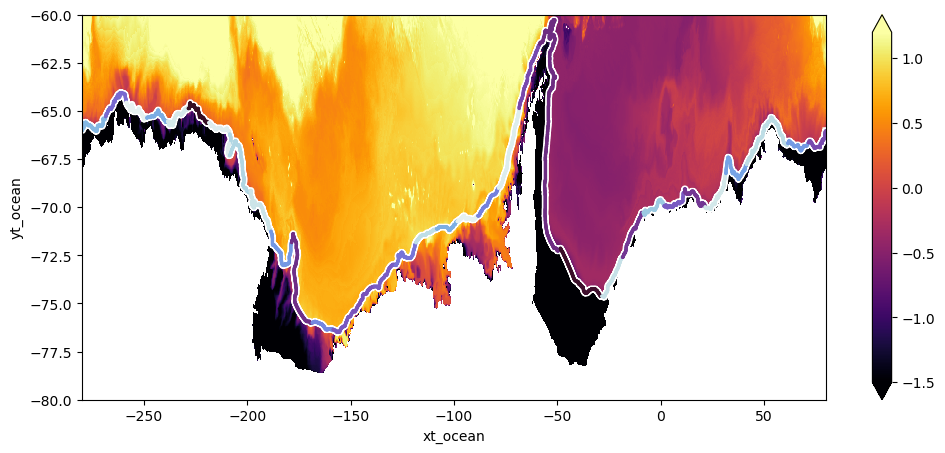

In [20]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
CDW_mean_temp.plot.pcolormesh(vmin=-1.5,vmax=1.2,ax = ax1, cmap='inferno')
ax1.plot(CSHT_along_fine.lon_along_contour.isel(time=0),CSHT_along_fine.lat_along_contour.isel(time=0),\
         color='white',zorder = 1,linewidth=5)

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0),\
            CSHT_along_fine.lat_along_contour.isel(time=0),s=2,\
            c = r_sq_daily_10deg_interp, cmap=cmocean.dense)

plt.xlim(-280,80)
plt.ylim(-80,-60)




Using the sigma definition:

(-80.0, -60.0)

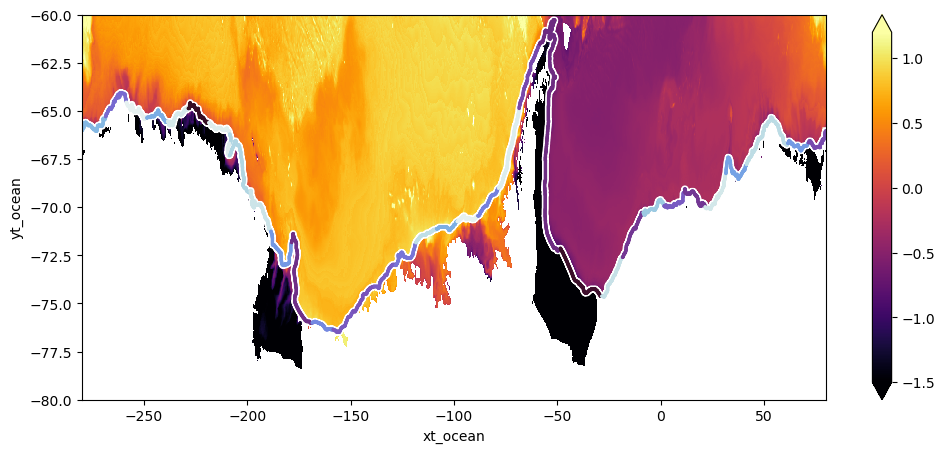

In [21]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
CDW_mean_temp_σ0.plot.pcolormesh(vmin=-1.5,vmax=1.2,cmap='inferno')
ax1.plot(CSHT_along_fine.lon_along_contour.isel(time=0),CSHT_along_fine.lat_along_contour.isel(time=0),\
         color='white',zorder = 1,linewidth=5)

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0),\
            CSHT_along_fine.lat_along_contour.isel(time=0),s=2,\
            c = r_sq_daily_10deg_interp, cmap=cmocean.dense)
plt.ylim(-80,-60)

The temperature doesnt seem to yield any visual alignment with the correlations ( example of daily there). However, the high correlation seems to happen to me near locations where we have CDW continuously reaching the shelf. SO perhaps it might be worth evaluating the hypothesis of the depth of CDW isopycnal layers vs depth of shelf


Notice that these are also close to the DSW formation regions

Let's evaluate that one

## Part 2: Shelf mean depth vs CDW depth

Importing depth of model in T points

In [22]:
ht =  cc.querying.getvar(iaf_cycle3,'ht',session , n=1, chunks = {}).sel(yt_ocean=slice(-90,-55)).compute()


Defining shelf mask to seaparate the continental shelf

In [23]:
def shelf_mask_isobath(var):
    '''
    Masks ACCESS-OM2-01 variables by the region polewards of the 1000m isobath as computed using 
    a script contributed by Adele Morrison.
    Only to be used with ACCESS-OM2-0.1 output!
    '''
    contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')
    
    shelf_mask = contour_file['contour_masked_above']
    yt_ocean = contour_file['yt_ocean']
    xt_ocean = contour_file['xt_ocean']
    
    # in this file the points along the isobath are given a positive value, the points outside (northwards) 
    # of the isobath are given a value of -100 and all the points on the continental shelf have a value of 0 
    # so we mask for the 0 values 
    shelf_mask[np.where(shelf_mask!=0)] = np.nan
    shelf_mask = shelf_mask+1
    shelf_map  = np.nan_to_num(shelf_mask)
    shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    shelf_map  = xr.DataArray(shelf_map,  coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    
    # then we want to multiply the variable with the mask so we need to account for the shape of the mask. 
    # The mask uses a northern cutoff of 59S.
    masked_var = var.sel(yt_ocean = slice(-90, -59.03)) * shelf_mask

    return masked_var, shelf_map

Let's calculate $\Delta H$, which is the difference between the CDW minimum depth with the model topography

In [24]:
ΔH =  ht - CDW_min_depth_σ0
ΔH_shelf, shelf_map = shelf_mask_isobath(ΔH)

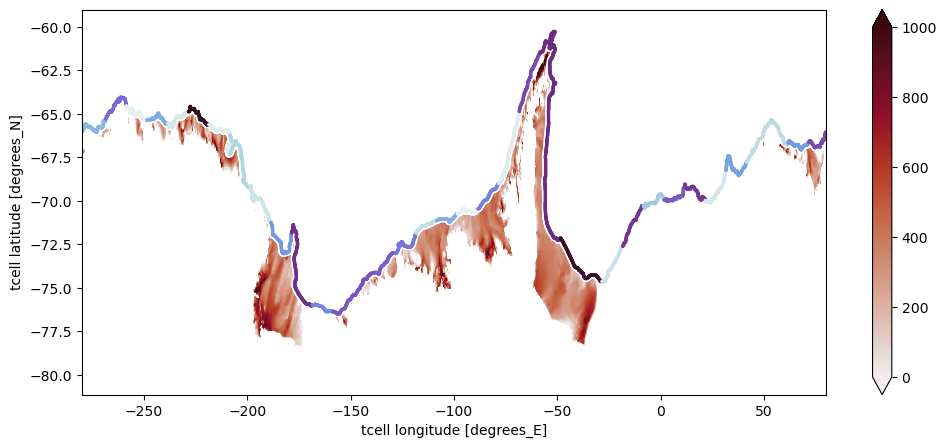

In [25]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
ΔH_shelf.plot.pcolormesh(vmin=0,vmax=1000,cmap=cmocean.amp)

ax1.plot(CSHT_along_fine.lon_along_contour.isel(time=0),CSHT_along_fine.lat_along_contour.isel(time=0),\
         color='white',zorder = 1,linewidth=5)

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0),\
            CSHT_along_fine.lat_along_contour.isel(time=0),s=2,\
            c = r_sq_daily_10deg_interp, cmap=cmocean.dense)

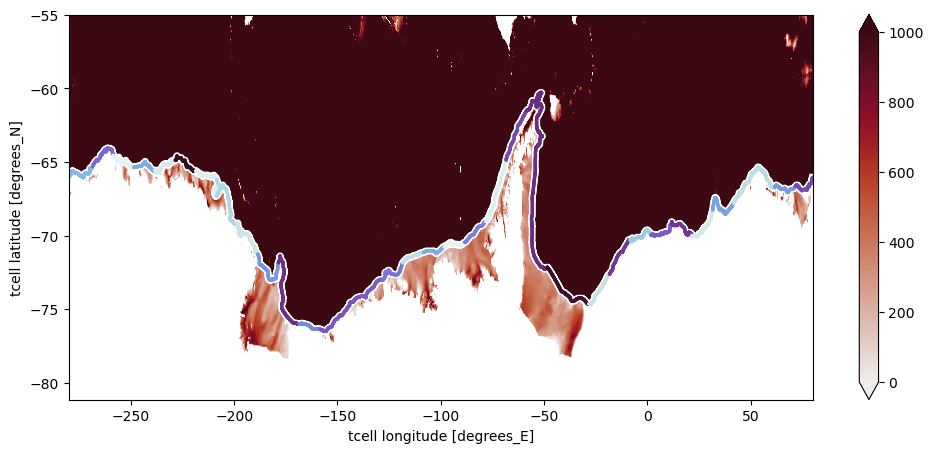

In [26]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
ΔH.plot.pcolormesh(vmin=0,vmax=1000,cmap=cmocean.amp)

ax1.plot(CSHT_along_fine.lon_along_contour.isel(time=0),CSHT_along_fine.lat_along_contour.isel(time=0),\
         color='white',zorder = 1,linewidth=5)

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0),\
            CSHT_along_fine.lat_along_contour.isel(time=0),s=2,\
            c = r_sq_daily_10deg_interp, cmap=cmocean.dense)

Let's do another test where we plot [a], the mean depth on the shelf in each 10-deg bin, [b] the vertical extent of CDW, [c] the correlations in each bin, for each timescale

NameError: name 'CDW_light_zmean_halo' is not defined

In [28]:
#getting the depth of CDW for making the fill plots
CDW_dense_zmean_halo = xr.open_dataset('/g/data/x77/wf4500/ASC_project/Post_process/CDW_dense_zmean_halo.nc').st_edges_ocean

#we actually want the lighter surface
CDW_light_zmean_halo = xr.open_dataset('/g/data/x77/wf4500/ASC_project/Post_process/CDW_light_zmean_halo.nc').st_edges_ocean

In [29]:
area =  cc.querying.getvar(iaf_cycle3,'area_t',session , n=1, chunks = {}).sel(yt_ocean=slice(-90,-55)).compute()

In [30]:
ht_shelf, shelf_map = shelf_mask_isobath(ht)
area_shelf, shelf_map = shelf_mask_isobath(area)

removing deep valleys inside the shelf

In [31]:
ht_shelf_no_valleys = ht_shelf.where(ht_shelf<1000)

In [33]:
lon_bin=10
bin_edges = CDW_light_zmean_halo.lon_bins

In [34]:

weightedmeantop = (ht_shelf_no_valleys * area_shelf).groupby_bins('xt_ocean',bins = bin_edges).mean(('xt_ocean','yt_ocean'))
weightedmeabottom = (area_shelf).groupby_bins('xt_ocean',bins = bin_edges).mean(('xt_ocean','yt_ocean'))

ht_shelf_binned = weightedmeantop/weightedmeabottom


#Min shelf depth
ht_shelf_binned_min = (ht_shelf_no_valleys).groupby_bins('xt_ocean',bins = bin_edges).min(('xt_ocean','yt_ocean'))
ht_shelf_binned_max = (ht_shelf_no_valleys).groupby_bins('xt_ocean',bins = bin_edges).max(('xt_ocean','yt_ocean'))



INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'


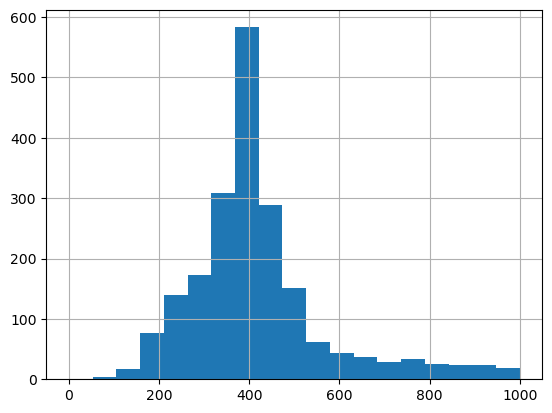

In [35]:
plt.hist(ht_shelf_no_valleys.sel(xt_ocean=slice(bin_edges[0],bin_edges[1])).values.ravel(),np.linspace(0,1000,20))
plt.grid()

LEt's try to get the modal depth of the shelf instead

In [36]:
modal_depth  = np.array(bin_edges[:-1] * 0)
for n in np.arange(bin_edges.size - 1):
    hist, binshist = np.histogram(ht_shelf_no_valleys.sel(xt_ocean=slice(bin_edges[n],bin_edges[n+1])).values.ravel(),\
                                  bins = np.linspace(0,1000,20) )
    modal_depth[n] = binshist[np.argmax(hist)]

In [37]:
ht_depth_moda = ht_shelf_binned_min.copy()
ht_depth_moda.values = modal_depth

In [38]:
# now interpolate onto lon_along_contour:
r_sq_all_10deg_interp = r_sq_all_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})


In [39]:

# now interpolate onto lon_along_contour:
r_sq_annual_10deg_interp = r_sq_annual_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})



In [40]:
# get things ready for plotting (land mask and colormap)

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

# Data required for lat/lon mapping
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt = '01deg_jra55v13_ryf9091'
lat_slice = slice(-80, -59)
hu = cc.querying.getvar(expt, 'hu', session, n=1)
hu = hu.sel(yu_ocean=lat_slice)
hu = hu.load()
land_mask = np.squeeze(hu.values)
land_mask = land_mask * 0
land_mask[np.isnan(land_mask)] = 1
yu_ocean = hu.yu_ocean.values
xu_ocean = hu.xu_ocean.values
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# Make land go all the way to -90S:
land_mask_lat = hu.yu_ocean.values
land_mask_lat[0] = -90

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [41]:
age_norm_along_contour = age_norm.\
sel(xt_ocean = CSHT_along_fine.lon_along_contour.isel(time=0), \
    yt_ocean  =CSHT_along_fine.lat_along_contour.isel(time=0), method = 'nearest')

In [42]:
CDW_by_z_age = age_norm_along_contour.where(age_norm_along_contour>=0.95)
CDW_by_z_age = ((CDW_by_z_age *0) +1) * CDW_by_z_age.st_ocean
CDW_by_z_age_min = CDW_by_z_age.min('st_ocean')
CDW_by_z_age_max = CDW_by_z_age.max('st_ocean')

#binning
CDW_by_z_age_min_lon = CDW_by_z_age_min.rename({'contour_index':'lons'})
CDW_by_z_age_min_lon['lons'] = CSHT_along_fine.lon_along_contour.isel(time=0).values
CDW_by_z_age_min_lon = CDW_by_z_age_min_lon.groupby_bins('lons',bins = bin_edges).mean()

CDW_by_z_age_max_lon = CDW_by_z_age_max.rename({'contour_index':'lons'})
CDW_by_z_age_max_lon['lons'] = CSHT_along_fine.lon_along_contour.isel(time=0).values
CDW_by_z_age_max_lon = CDW_by_z_age_max_lon.groupby_bins('lons',bins = bin_edges).mean()

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'


with binned CDW depth by age

Text(0, 0.5, 'Depth [m]')

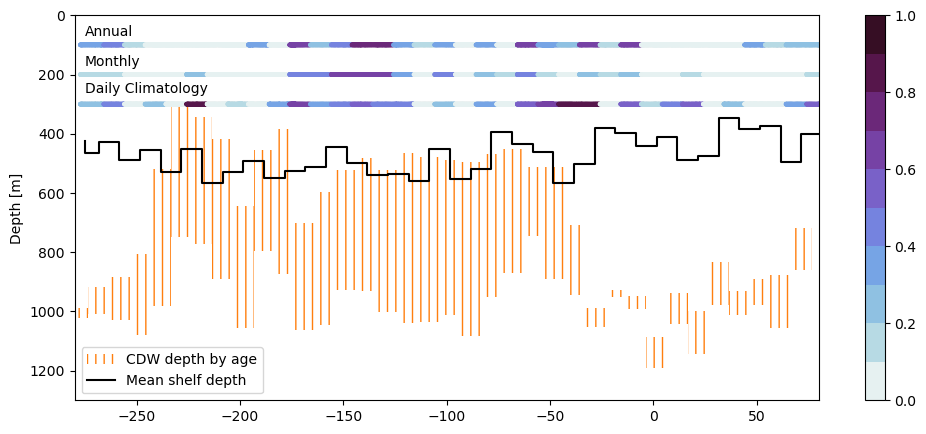

In [43]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
plt.fill_between(x = bin_edges[:-1], y1 = CDW_by_z_age_min_lon.values, y2=  CDW_by_z_age_max_lon.values\
                  ,step='post',hatch="||",color='tab:orange',facecolor='none',linewidth=0,label='CDW depth by age')
plt.step(bin_edges[:-1]+5,ht_shelf_binned,color='black', label = r'Mean shelf depth')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+100,s=5,\
            c = r_sq_annual_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,70,'Annual')


plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+200,s=5,\
            c = r_sq_all_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,170,'Monthly')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+300,s=5,\
            c = r_sq_daily_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,260,'Daily Climatology')

plt.colorbar()
plt.legend()
plt.ylim(1300,0)
plt.xlim(-280,80)
plt.ylabel('Depth [m]')


With unbinned CDW depth

Text(0, 0.5, 'Depth [m]')

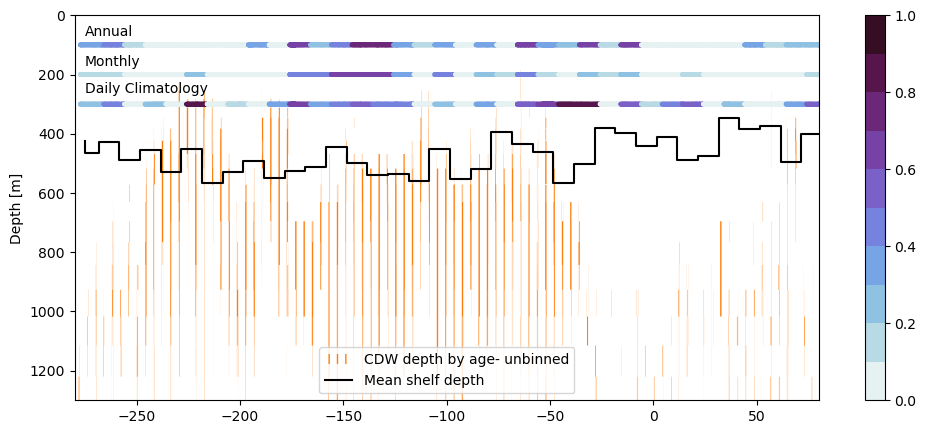

In [44]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
plt.fill_between(x = CSHT_along_fine.lon_along_contour.isel(time=0), y1 = CDW_by_z_age_min,\
                 y2=  CDW_by_z_age_max\
                  ,step='post',hatch="||",color='tab:orange',facecolor='none',linewidth=0,\
                 label='CDW depth by age- unbinned')
plt.step(bin_edges[:-1]+5,ht_shelf_binned,color='black', label = r'Mean shelf depth')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+100,s=5,\
            c = r_sq_annual_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,70,'Annual')


plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+200,s=5,\
            c = r_sq_all_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,170,'Monthly')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+300,s=5,\
            c = r_sq_daily_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,260,'Daily Climatology')

plt.colorbar()
plt.legend()
plt.ylim(1300,0)
plt.xlim(-280,80)
plt.ylabel('Depth [m]')

with binned CDW depth by density

In [45]:
CDW_light_zmean_halo.lon_bins

<xarray.DataArray 'lon_bins' (lon_bins: 38)> Size: 304B
array([-280. , -273.5, -263.5, -253.5, -243.5, -233.5, -223.5, -213.5, -203.5,
       -193.5, -183.5, -173.5, -163.5, -153.5, -143.5, -133.5, -123.5, -113.5,
       -103.5,  -93.5,  -83.5,  -73.5,  -63.5,  -53.5,  -43.5,  -33.5,  -23.5,
        -13.5,   -3.5,    6.5,   16.5,   26.5,   36.5,   46.5,   56.5,   66.5,
         76.5,   85. ])
Coordinates:
  * lon_bins  (lon_bins) float64 304B -280.0 -273.5 -263.5 ... 66.5 76.5 85.0

Text(0, 0.5, 'Depth [m]')

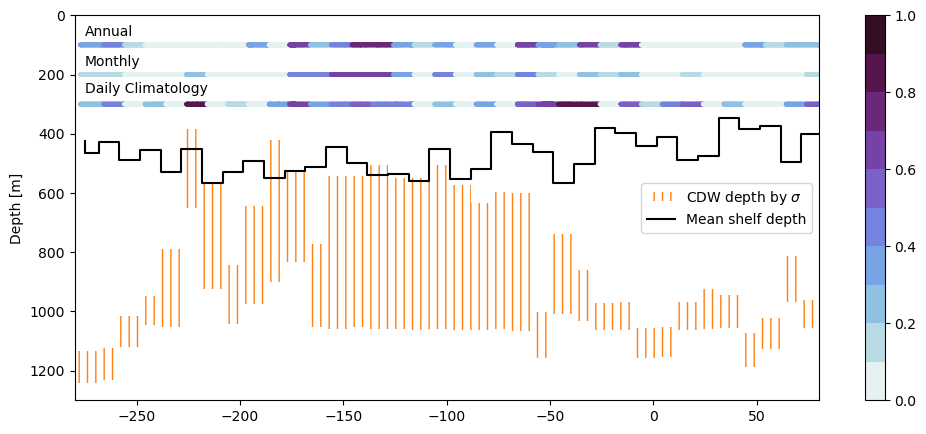

In [46]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
plt.fill_between(x = CDW_light_zmean_halo.lon_bins, y1 = CDW_light_zmean_halo, y2=  CDW_dense_zmean_halo\
                  ,step='mid',hatch="||",color='tab:orange',facecolor='none',linewidth=0,label=r'CDW depth by $\sigma$')
plt.step(bin_edges[:-1]+5,ht_shelf_binned,color='black', label = r'Mean shelf depth')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+100,s=5,\
            c = r_sq_annual_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,70,'Annual')


plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+200,s=5,\
            c = r_sq_all_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,170,'Monthly')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+300,s=5,\
            c = r_sq_daily_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,260,'Daily Climatology')

plt.colorbar()
plt.legend()
plt.ylim(1300,0)
plt.xlim(-280,80)
plt.ylabel('Depth [m]')


Finally, with the modal depth

Text(0, 0.5, 'Depth [m]')

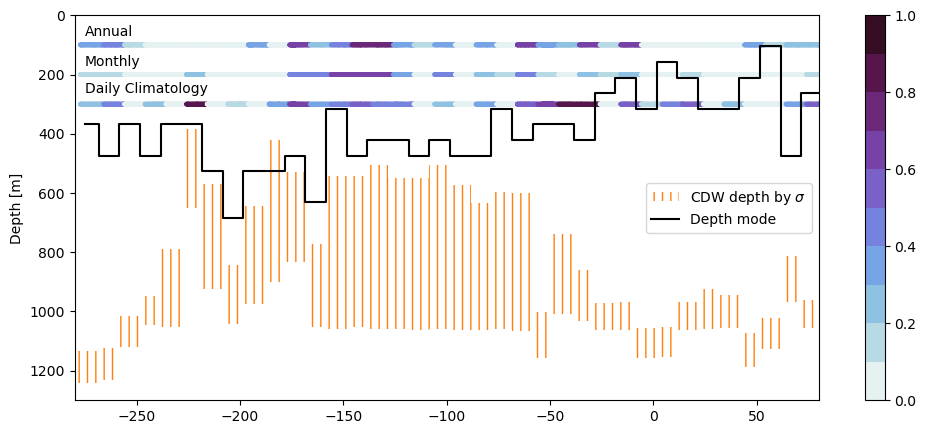

In [47]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
plt.fill_between(x = CDW_light_zmean_halo.lon_bins, y1 = CDW_light_zmean_halo, y2=  CDW_dense_zmean_halo\
                  ,step='mid',hatch="||",color='tab:orange',facecolor='none',linewidth=0,label=r'CDW depth by $\sigma$')
plt.step(bin_edges[:-1]+5,ht_depth_moda,color='black', label = r'Depth mode ')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+100,s=5,\
            c = r_sq_annual_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,70,'Annual')


plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+200,s=5,\
            c = r_sq_all_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,170,'Monthly')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+300,s=5,\
            c = r_sq_daily_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,260,'Daily Climatology')

plt.colorbar()
plt.legend()
plt.ylim(1300,0)
plt.xlim(-280,80)
plt.ylabel('Depth [m]')


What about the variability of these density layers depth?


In [48]:
# monthly water mass mask 
age_mask = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/**_age_mask.nc').CDW_mask.compute()
daily_age_mask = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/****_age_Climatology_mask.nc').CDW_mask.compute()

Lets get the minimum and maximum densities of our CDW defitinion

In [49]:
age_mask_min_CDW_density = (age_mask.where(age_mask>0) * age_mask.potrho0).min('potrho0')
age_mask_max_CDW_density = (age_mask.where(age_mask>0) * age_mask.potrho0).max('potrho0')

age_mask_min_CDW_density_std = age_mask_min_CDW_density.std('time')

Text(0, 0.5, 'Depth [m]')

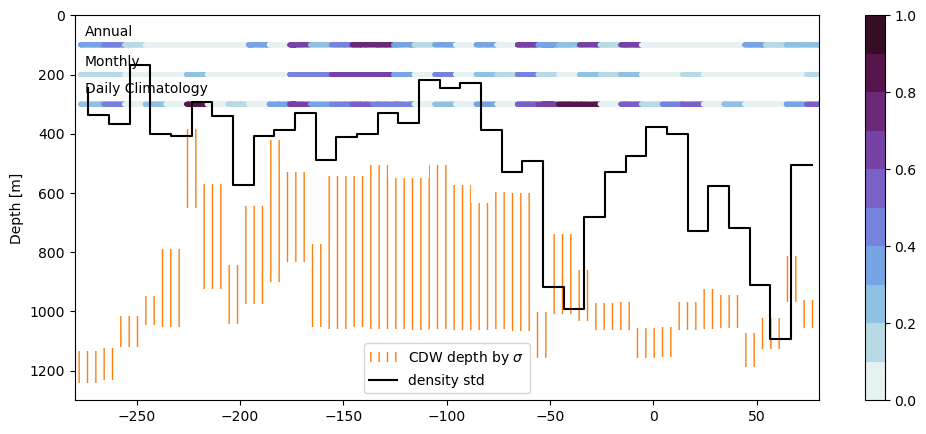

In [50]:
plt.figure(figsize =(12,5))
ax1 = plt.subplot(1,1,1)
plt.fill_between(x = CDW_light_zmean_halo.lon_bins, y1 = CDW_light_zmean_halo, y2=  CDW_dense_zmean_halo\
                  ,step='mid',hatch="||",color='tab:orange',facecolor='none',linewidth=0,label=r'CDW depth by $\sigma$')


plt.step(age_mask_min_CDW_density_std.lon_bins,age_mask_min_CDW_density_std*5e4,color='black', label = r'density std')

#plt.step(bin_edges[:-1]+5,ht_depth_moda,color='black', label = r'Depth mode ')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+100,s=5,\
            c = r_sq_annual_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,70,'Annual')


plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+200,s=5,\
            c = r_sq_all_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,170,'Monthly')

plt.scatter(CSHT_along_fine.lon_along_contour.isel(time=0)+2.5,\
            (CSHT_along_fine.lat_along_contour.isel(time=0)*0)+300,s=5,\
            c = r_sq_daily_10deg_interp, cmap=discrete_cmap(10,cmocean.dense),vmin=0,vmax=1)
plt.text(-275,260,'Daily Climatology')

plt.colorbar()
plt.legend()
plt.ylim(1300,0)
plt.xlim(-280,80)
plt.ylabel('Depth [m]')


Importing $\sigma_0$ along contour

In [431]:
Below here it seems to me that bins are inconsistent!

SyntaxError: invalid syntax (1690418299.py, line 1)

In [432]:

rho0_contour = xr.open_dataset('/g/data/x77/wf4500/ASC_project/Post_process/rho0_along_contour.nc').pot_rho_0
rho0_contour['time'] = age_mask_min_CDW_density.time
rho0_contour = rho0_contour.rename({'contour_index':'lon'})
rho0_contour['lon'] = CSHT_lon_along_contour.values
rho0_contour = rho0_contour.groupby_bins('lon',bins = bin_edges).mean()


INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'


In [437]:
age_mask_min_CDW_density


<xarray.DataArray (time: 732, lon_bins: 36)> Size: 211kB
array([[27.82387394, 27.82387394, 27.83845578, ..., 27.83845578,
        27.82387394, 27.82387394],
       [27.8092921 , 27.82387394, 27.83845578, ..., 27.83845578,
        27.82387394, 27.82387394],
       [27.82387394, 27.8092921 , 27.82387394, ..., 27.83845578,
        27.82387394, 27.82387394],
       ...,
       [27.82387394, 27.82387394, 27.83845578, ..., 27.82387394,
        27.82387394, 27.82387394],
       [27.8092921 , 27.82387394, 27.83845578, ..., 27.83845578,
        27.82387394, 27.82387394],
       [27.82387394, 27.82387394, 27.83845578, ..., 27.83845578,
        27.83845578, 27.82387394]])
Coordinates:
  * time      (time) datetime64[ns] 6kB 1958-01-31 1958-02-28 ... 2018-12-31
  * lon_bins  (lon_bins) float64 288B -273.5 -263.5 -253.5 ... 56.5 66.5 76.5

In [423]:
age_mask_min_CDW_density

<xarray.DataArray (time: 732, lon_bins: 36)> Size: 211kB
array([[27.82387394, 27.82387394, 27.83845578, ..., 27.83845578,
        27.82387394, 27.82387394],
       [27.8092921 , 27.82387394, 27.83845578, ..., 27.83845578,
        27.82387394, 27.82387394],
       [27.82387394, 27.8092921 , 27.82387394, ..., 27.83845578,
        27.82387394, 27.82387394],
       ...,
       [27.82387394, 27.82387394, 27.83845578, ..., 27.82387394,
        27.82387394, 27.82387394],
       [27.8092921 , 27.82387394, 27.83845578, ..., 27.83845578,
        27.82387394, 27.82387394],
       [27.82387394, 27.82387394, 27.83845578, ..., 27.83845578,
        27.83845578, 27.82387394]])
Coordinates:
  * time      (time) datetime64[ns] 6kB 1958-01-31 1958-02-28 ... 2018-12-31
  * lon_bins  (lon_bins) float64 288B -273.5 -263.5 -253.5 ... 56.5 66.5 76.5

Binning along 10 degree bins

In [419]:
#extracting the depth
CSHT_lon_along_contour


<xarray.DataArray 'lon_along_contour' (contour_index: 6002)> Size: 48kB
dask.array<getitem, shape=(6002,), dtype=float64, chunksize=(6002,), chunktype=numpy.ndarray>
Coordinates:
  * contour_index  (contour_index) int64 48kB 1 2 3 4 5 ... 5999 6000 6001 6002
    time           datetime64[ns] 8B 1958-01-31

In [417]:
rho0_contour

<xarray.DataArray 'pot_rho_0' (time: 732, st_ocean: 75, contour_index: 6002)> Size: 3GB
[329509800 values with dtype=float64]
Coordinates:
  * st_ocean       (st_ocean) float64 600B 0.5413 1.681 ... 5.511e+03 5.709e+03
  * contour_index  (contour_index) int64 48kB 1 2 3 4 5 ... 5999 6000 6001 6002
  * time           (time) datetime64[ns] 6kB 1958-01-31 ... 2018-12-31
Attributes:
    long_name:      potential density referenced to 0 dbar
    units:          kg/m^3
    valid_range:    [-1.e+01  1.e+05]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_density
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...